In [1]:
include("../../../julia/FNC_init.jl")

  Activating 

project at `~/Documents/GitHub/fnc`


[**Demo %s**](#demo-orthogonal-approx)

Let's approximate $e^x$ over the interval $[−1,1]$. We can sample it at, say, 15 points, and find the best-fitting straight line to that data.

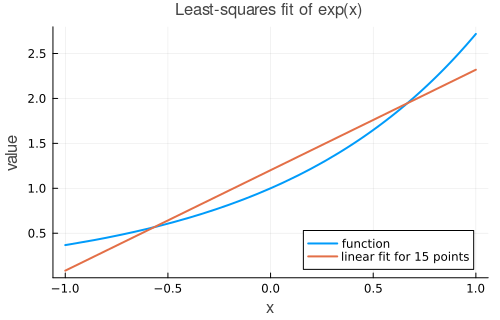

In [2]:
plot(exp, -1, 1, label="function")
t = range(-1, 1, 15)
y = exp.(t)
V = [ti^j for ti in t, j in 0:1]  # Vandermonde-ish
c = V \ y
plot!(t -> c[1] + c[2] * t, -1, 1;
    label="linear fit for 15 points", legend=:bottomright,
    xaxis=("x"),  yaxis=("value"),
    title="Least-squares fit of exp(x)")

There's nothing special about 20 points. Choosing more doesn't change the result much.

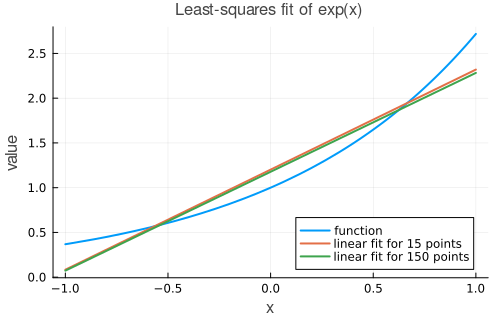

In [3]:
t = range(-1, 1, 150)
y = exp.(t)
V = [ ti^j for ti in t, j=0:1 ]
c = V \ y
plot!(t -> c[1] + c[2]*t, -1, 1,
    label="linear fit for 150 points",  legend=:bottomright,
    xaxis=("x"),  yaxis=("value"),
    title="Least-squares fit of exp(x)")

This situation is unlike interpolation, where the degree of the interpolant increases with the number of nodes. Here, the linear fit is apparently approaching a limit that we may think of as a continuous least-squares fit.

In [4]:
n = 40:60:400
slope = zeros(size(n))
intercept = zeros(size(n))

for (k, n) in enumerate(n)
    t = range(-1, 1, n)
    y = exp.(t)
    V = [ ti^j for ti in t, j in 0:1 ]
    c = V \ y
    intercept[k], slope[k] = c
end

labels = ["n", "intercept", "slope"]
@pt :header=labels, [n intercept slope]